In [1]:
import pandas as pd
#import spacetimeformer

In [2]:
data = pd.read_csv('2015年GBDT输入数据集csv版_各网格数量.csv')

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
data

,month,week,hour,weather,temperature,grid1,grid2,grid3,grid4,grid5,...,grid28,grid29,grid30,grid31,grid32,grid33,grid34,grid35,grid36,grid37
0,1,4,0,1,-2,0.013525,0.007182,0.010669,0.017221,0.022093,...,0.051075,0.007350,0.010543,0.025076,0.015709,0.018061,0.007812,0.007939,0.009325,0.003276
1,1,4,1,1,-2,0.017771,0.012348,0.013015,0.017771,0.021775,...,0.063866,0.009553,0.012264,0.031620,0.019064,0.021901,0.012306,0.010012,0.004964,0.000167
2,1,4,2,1,-2,0.020935,0.011350,0.012561,0.019422,0.027039,...,0.067447,0.006054,0.012965,0.029208,0.015739,0.019775,0.010493,0.009635,0.000454,0.000252
3,1,4,3,1,-3,0.018250,0.010139,0.011530,0.026304,0.040324,...,0.047914,0.003940,0.007300,0.019757,0.010197,0.015527,0.006721,0.006721,0.001275,0.000174
4,1,4,4,1,-3,0.013175,0.009032,0.010109,0.021876,0.044498,...,0.041515,0.003149,0.007706,0.016573,0.007872,0.010358,0.005635,0.006961,0.002072,0.000829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,12,4,19,1,7,0.017415,0.009634,0.018050,0.011592,0.011751,...,0.056161,0.011857,0.014345,0.025090,0.022073,0.017997,0.012651,0.006828,0.018685,0.021808
8756,12,4,20,1,7,0.016752,0.009142,0.019619,0.012255,0.013936,...,0.053914,0.012157,0.014034,0.026092,0.021496,0.018927,0.010921,0.008796,0.022831,0.015023
8757,12,4,21,1,7,0.017541,0.008074,0.016869,0.011822,0.013745,...,0.053153,0.008939,0.009996,0.025375,0.020136,0.020233,0.010092,0.006920,0.025183,0.017782
8758,12,4,22,1,6,0.015870,0.009643,0.014382,0.013500,0.018900,...,0.046121,0.009588,0.010084,0.024466,0.020498,0.019727,0.010690,0.007439,0.029039,0.015153


In [5]:
pd.date_range(start="2015-01-01 00:00:00", end="2015-12-31 23:00:00", freq="H")

DatetimeIndex(['2015-01-01 00:00:00', '2015-01-01 01:00:00',
               '2015-01-01 02:00:00', '2015-01-01 03:00:00',
               '2015-01-01 04:00:00', '2015-01-01 05:00:00',
               '2015-01-01 06:00:00', '2015-01-01 07:00:00',
               '2015-01-01 08:00:00', '2015-01-01 09:00:00',
               ...
               '2015-12-31 14:00:00', '2015-12-31 15:00:00',
               '2015-12-31 16:00:00', '2015-12-31 17:00:00',
               '2015-12-31 18:00:00', '2015-12-31 19:00:00',
               '2015-12-31 20:00:00', '2015-12-31 21:00:00',
               '2015-12-31 22:00:00', '2015-12-31 23:00:00'],
              dtype='datetime64[ns]', length=8760, freq='H')

In [6]:
data.index = pd.date_range(start="2015-01-01 00:00:00", end="2015-12-31 23:00:00", freq="H")

In [7]:
data

,month,week,hour,weather,temperature,grid1,grid2,grid3,grid4,grid5,...,grid28,grid29,grid30,grid31,grid32,grid33,grid34,grid35,grid36,grid37
2015-01-01 00:00:00,1,4,0,1,-2,0.013525,0.007182,0.010669,0.017221,0.022093,...,0.051075,0.007350,0.010543,0.025076,0.015709,0.018061,0.007812,0.007939,0.009325,0.003276
2015-01-01 01:00:00,1,4,1,1,-2,0.017771,0.012348,0.013015,0.017771,0.021775,...,0.063866,0.009553,0.012264,0.031620,0.019064,0.021901,0.012306,0.010012,0.004964,0.000167
2015-01-01 02:00:00,1,4,2,1,-2,0.020935,0.011350,0.012561,0.019422,0.027039,...,0.067447,0.006054,0.012965,0.029208,0.015739,0.019775,0.010493,0.009635,0.000454,0.000252
2015-01-01 03:00:00,1,4,3,1,-3,0.018250,0.010139,0.011530,0.026304,0.040324,...,0.047914,0.003940,0.007300,0.019757,0.010197,0.015527,0.006721,0.006721,0.001275,0.000174
2015-01-01 04:00:00,1,4,4,1,-3,0.013175,0.009032,0.010109,0.021876,0.044498,...,0.041515,0.003149,0.007706,0.016573,0.007872,0.010358,0.005635,0.006961,0.002072,0.000829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,12,4,19,1,7,0.017415,0.009634,0.018050,0.011592,0.011751,...,0.056161,0.011857,0.014345,0.025090,0.022073,0.017997,0.012651,0.006828,0.018685,0.021808
2015-12-31 20:00:00,12,4,20,1,7,0.016752,0.009142,0.019619,0.012255,0.013936,...,0.053914,0.012157,0.014034,0.026092,0.021496,0.018927,0.010921,0.008796,0.022831,0.015023
2015-12-31 21:00:00,12,4,21,1,7,0.017541,0.008074,0.016869,0.011822,0.013745,...,0.053153,0.008939,0.009996,0.025375,0.020136,0.020233,0.010092,0.006920,0.025183,0.017782
2015-12-31 22:00:00,12,4,22,1,6,0.015870,0.009643,0.014382,0.013500,0.018900,...,0.046121,0.009588,0.010084,0.024466,0.020498,0.019727,0.010690,0.007439,0.029039,0.015153


In [9]:
%load_ext autoreload
%autoreload 2
from tensorflow.python.framework.ops import disable_eager_execution
import tensorflow as tf

disable_eager_execution()  # for graph mode
tf.compat.v1.experimental.output_all_intermediates(True)
#from time_series.dataset.utils import get_energy_demand
from time_series.dataset.time_series import TrainingDataSet
import pandas as pd
import pyreadr
from sklearn.preprocessing import StandardScaler



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
df = data[['grid1', 'grid2',
       'grid3', 'grid4', 'grid5', 'grid6', 'grid7', 'grid8', 'grid9', 'grid10',
       'grid11', 'grid12', 'grid13', 'grid14', 'grid15', 'grid16', 'grid17',
       'grid18', 'grid19', 'grid20', 'grid21', 'grid22', 'grid23', 'grid24',
       'grid25', 'grid26', 'grid27', 'grid28', 'grid29', 'grid30', 'grid31',
       'grid32', 'grid33', 'grid34', 'grid35', 'grid36', 'grid37']]
train_df = pd.DataFrame(data=StandardScaler().fit_transform(df), columns=df.columns, index=df.index)
#tds = TrainingDataSet(df)
tds = TrainingDataSet(df = train_df,lag = 24)

In [12]:
from time_series.models.LSTM import LSTM
lstm = LSTM(tds)
lstm.instantiate_and_fit(verbose=1, epochs=100)
#y_predicted = lstm.model.predict(tds.X_test, steps=10)
#evaluate_model(first_n=10)
print(lstm.model.evaluate(tds.X_test, tds.y_test))

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 24, 37)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 24, 100)           55200     
_________________________________________________________________
dense (Dense)                (None, 24, 37)            3737      
Total params: 58,937
Trainable params: 58,937
Non-trainable params: 0
_________________________________________________________________
None
Train on 7008 samples
Epoch 1/100
7008/7008 [==============================] - 1s 196us/sample - loss: 0.3732 - mean_absolute_percentage_error: 287.3584 - mae: 0.4146 - mse: 0.3732
Epoch 2/100
7008/7008 [==============================] - 1s 181us/sample - loss: 0.2454 - mean_absolute_percentage_error: 263.9250 - mae: 0.3250 - mse: 0.2454
Epoch 3/100
7008/7008 [===================

7008/7008 [==============================] - 1s 179us/sample - loss: 0.0916 - mean_absolute_percentage_error: 187.6128 - mae: 0.2152 - mse: 0.0916
Epoch 99/100
7008/7008 [==============================] - 1s 178us/sample - loss: 0.0915 - mean_absolute_percentage_error: 187.4629 - mae: 0.2152 - mse: 0.0915
Epoch 100/100
7008/7008 [==============================] - 1s 177us/sample - loss: 0.0915 - mean_absolute_percentage_error: 186.3531 - mae: 0.2153 - mse: 0.0915
[0.3831172502703137, 238.87222, 0.41084096, 0.38311717]


C:\Users\Administrator\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2323: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


C:\Users\Administrator\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2323: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


MSE: 0.3831
----------
grid1: 0.58
grid2: 0.47
grid3: 0.24
grid4: 0.4
grid5: 0.13
grid6: 0.22
grid7: 0.07
grid8: 0.03
grid9: 0.43
grid10: 0.23
grid11: 0.16
grid12: 0.14
grid13: 0.5
grid14: 0.75
grid15: 0.2
grid16: 0.25
grid17: 0.16
grid18: 0.2
grid19: 0.08
grid20: 0.77
grid21: 0.29
grid22: 0.4
grid23: 0.13
grid24: 0.11
grid25: 0.15
grid26: 0.18
grid27: 0.01
grid28: 0.15
grid29: 0.18
grid30: 0.13
grid31: 0.24
grid32: 0.07
grid33: 0.12
grid34: 0.08
grid35: 0.51
grid36: 0.25
grid37: 0.06


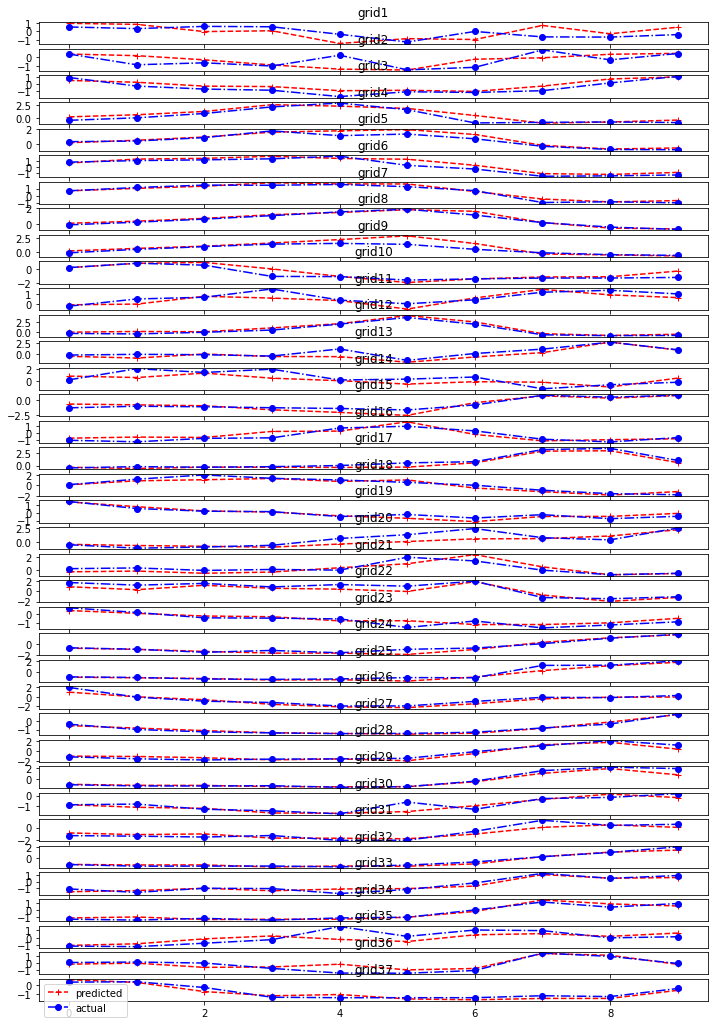

In [13]:
from time_series.utils import evaluate_model
y_predicted = lstm.model.predict(tds.X_test)
evaluate_model(tds=tds, y_predicted=y_predicted, columns=train_df.columns, first_n=10)

In [14]:
from time_series.models.nbeats import NBeatsNet

nb = NBeatsNet(tds,backcast_length = 24)
nb.instantiate_and_fit(verbose=1, epochs=20)
y_predicted = nb.model.predict(tds.X_test, steps=24)
#evaluate_model(first_n=10)
print(nb.model.evaluate(tds.X_test, tds.y_test))

Model: "forecast"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_variable (InputLayer)     [(None, 24, 37)]     0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 24)           0           input_variable[0][0]             
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 24)           0           input_variable[0][0]             
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 24)           0           input_variable[0][0]             
___________________________________________________________________________________________

add_173 (Add)                   (None, 24)           0           add_136[0][0]                    
                                                                 lambda_48[25][0]                 
__________________________________________________________________________________________________
add_174 (Add)                   (None, 24)           0           add_137[0][0]                    
                                                                 lambda_48[26][0]                 
__________________________________________________________________________________________________
add_175 (Add)                   (None, 24)           0           add_138[0][0]                    
                                                                 lambda_48[27][0]                 
__________________________________________________________________________________________________
add_176 (Add)                   (None, 24)           0           add_139[0][0]                    
          

Train on 7008 samples
Epoch 1/20
7008/7008 [==============================] - 47s 7ms/sample - loss: 0.4623
Epoch 2/20
7008/7008 [==============================] - 40s 6ms/sample - loss: 0.4183
Epoch 3/20
7008/7008 [==============================] - 41s 6ms/sample - loss: 0.4090
Epoch 4/20
7008/7008 [==============================] - 41s 6ms/sample - loss: 0.4030
Epoch 5/20
7008/7008 [==============================] - 41s 6ms/sample - loss: 0.39822s 
Epoch 6/20
7008/7008 [==============================] - 41s 6ms/sample - loss: 0.3933
Epoch 7/20
7008/7008 [==============================] - 41s 6ms/sample - loss: 0.3890
Epoch 8/20
7008/7008 [==============================] - 41s 6ms/sample - loss: 0.3854
Epoch 9/20
7008/7008 [==============================] - 40s 6ms/sample - loss: 0.3819
Epoch 10/20
7008/7008 [==============================] - 40s 6ms/sample - loss: 0.3787
Epoch 11/20
7008/7008 [==============================] - 40s 6ms/sample - loss: 0.3756
Epoch 12/20
7008/7008 [====

C:\Users\Administrator\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2323: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


0.40140983020817794


MSE: 0.3600
----------
grid1: 0.39
grid2: 0.62
grid3: 0.27
grid4: 0.67
grid5: 0.12
grid6: 0.25
grid7: 0.13
grid8: 0.09
grid9: 0.21
grid10: 0.41
grid11: 0.69
grid12: 0.15
grid13: 0.84
grid14: 0.69
grid15: 0.44
grid16: 0.86
grid17: 0.18
grid18: 0.42
grid19: 0.33
grid20: 0.62
grid21: 0.59
grid22: 0.96
grid23: 0.19
grid24: 0.15
grid25: 0.22
grid26: 0.34
grid27: 0.12
grid28: 0.26
grid29: 0.19
grid30: 0.22
grid31: 0.3
grid32: 0.12
grid33: 0.28
grid34: 0.22
grid35: 0.59
grid36: 0.34
grid37: 0.54


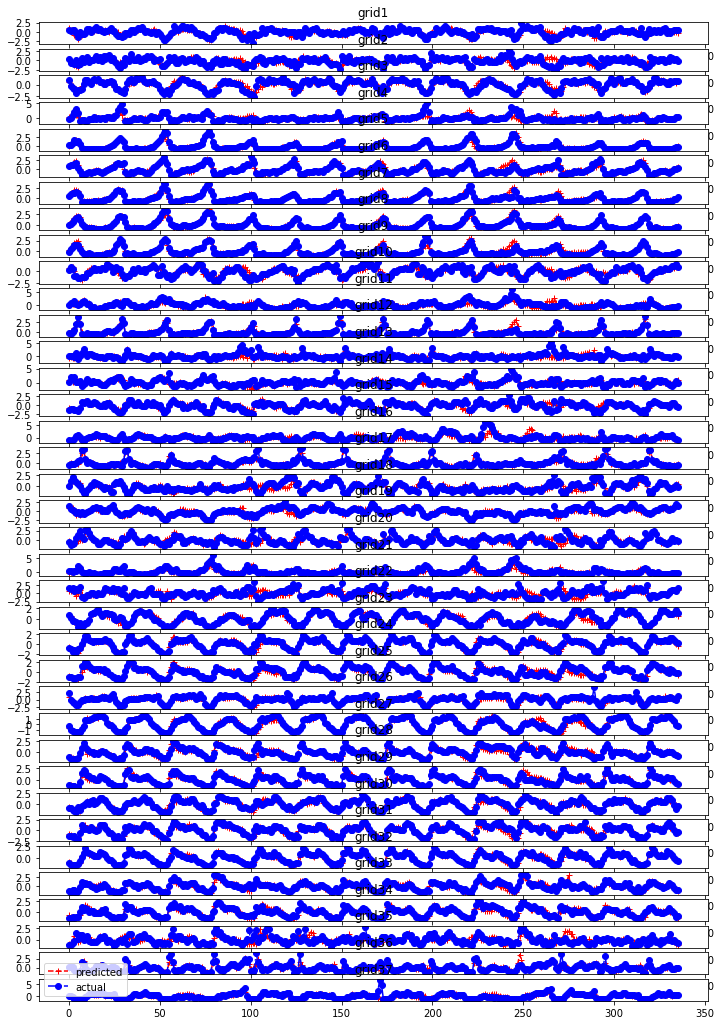

In [15]:
y_predicted = nb.model.predict(tds.X_test)
evaluate_model(tds=tds, y_predicted=y_predicted, columns=train_df.columns, first_n=24*14)

MSE: 0.3600
----------
grid1: 0.39
grid2: 0.62
grid3: 0.27
grid4: 0.67
grid5: 0.12
grid6: 0.25
grid7: 0.13
grid8: 0.09
grid9: 0.21
grid10: 0.41
grid11: 0.69
grid12: 0.15
grid13: 0.84
grid14: 0.69
grid15: 0.44
grid16: 0.86
grid17: 0.18
grid18: 0.42
grid19: 0.33
grid20: 0.62
grid21: 0.59
grid22: 0.96
grid23: 0.19
grid24: 0.15
grid25: 0.22
grid26: 0.34
grid27: 0.12
grid28: 0.26
grid29: 0.19
grid30: 0.22
grid31: 0.3
grid32: 0.12
grid33: 0.28
grid34: 0.22
grid35: 0.59
grid36: 0.34
grid37: 0.54
Help on NoneType object:

class NoneType(object)
 |  Methods defined here:
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __repr__(self, /)
 |      Return repr(self).
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.



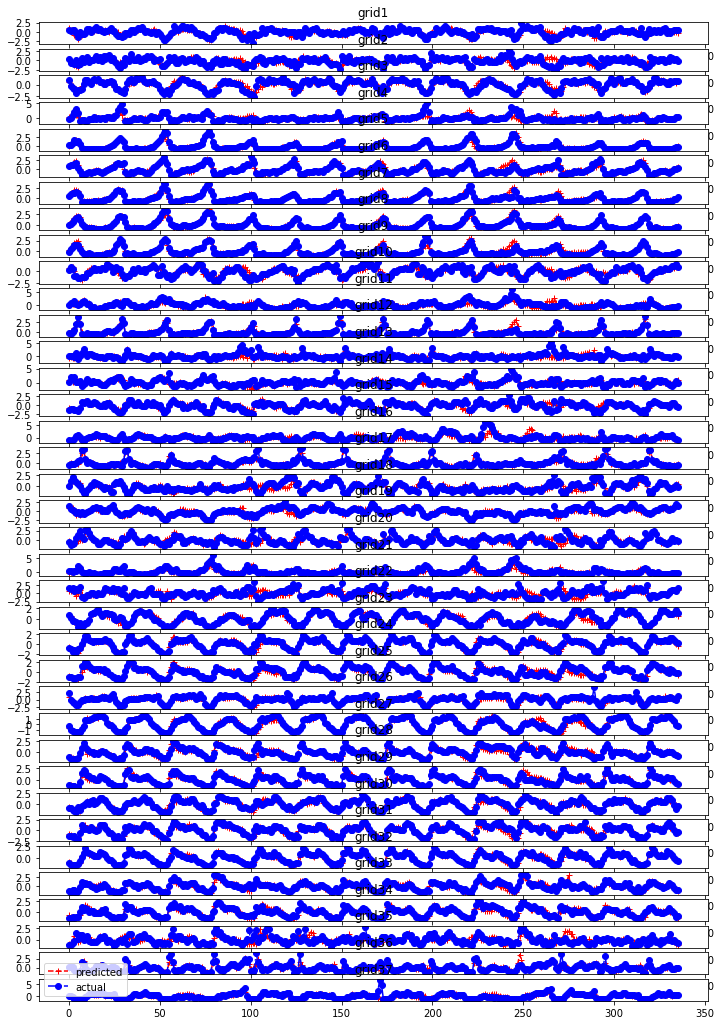

In [17]:

help(evaluate_model(tds=tds, y_predicted=y_predicted, columns=train_df.columns, first_n=24*14))